In [1]:
import pandas as pd

from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

import talib

import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
from matplotlib.pylab import date2num

In [2]:
# Get today's date as UTC timestamp
today = datetime.today().strftime("%d/%m/%Y")
today = datetime.strptime(today + " +0000", "%d/%m/%Y %z")
to = int(today.timestamp())
# Get date ten years ago as UTC timestamp
ten_yr_ago = today-relativedelta(years=10)
fro = int(ten_yr_ago.timestamp())

In [3]:
def get_price_hist(ticker):

    # Put stock price data in dataframe
    url = "https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={fro}&period2={to}&interval=1d&events=history".format(ticker=ticker, fro=fro, to=to)
    data = pd.read_csv(url)
    
    # Convert date to timestamp and make index
    data.index = data['Date'].apply(lambda x: pd.Timestamp(x))
    data.drop('Date', axis=1, inplace=True)

    return data


nflx_data = get_price_hist('NFLX')

In [4]:
nflx_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-04-19,12.178572,12.371428,11.824286,12.114285,12.114285,13470800
2010-04-20,12.154285,12.488571,12.122857,12.438571,12.438571,12414500
2010-04-21,12.635715,12.714286,12.198571,12.425714,12.425714,24311700
2010-04-22,13.000000,14.641429,12.950000,14.321428,14.321428,90442100
2010-04-23,14.287143,14.365714,13.765715,14.247143,14.247143,29817900
...,...,...,...,...,...,...
2020-04-09,371.059998,372.100006,363.029999,370.720001,370.720001,7711300
2020-04-13,371.309998,400.510010,367.700012,396.720001,396.720001,11692900
2020-04-14,397.500000,417.820007,394.850006,413.549988,413.549988,11581000


In [5]:
def get_indicators(data):

    # Compute MACD
    data["macd"], data["macd_signal"], data["macd_hist"] = talib.MACD(data['Close'])
    
    # Compute moving average
    data["ma10"] = talib.MA(data['Close'], timeperiod=10)
    data["ma30"] = talib.MA(data['Close'], timeperiod=30)
    
    # Compute RSI
    data["rsi"] = talib.RSI(data['Close'])
    return data


nflx_data = get_indicators(nflx_data)

In [6]:
nflx_data

,Open,High,Low,Close,Adj Close,Volume,macd,macd_signal,macd_hist,ma10,ma30,rsi
Date,,,,,,,,,,,,
2010-04-19,12.178572,12.371428,11.824286,12.114285,12.114285,13470800,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-20,12.154285,12.488571,12.122857,12.438571,12.438571,12414500,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-21,12.635715,12.714286,12.198571,12.425714,12.425714,24311700,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-22,13.000000,14.641429,12.950000,14.321428,14.321428,90442100,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-23,14.287143,14.365714,13.765715,14.247143,14.247143,29817900,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-09,371.059998,372.100006,363.029999,370.720001,370.720001,7711300,5.261553,2.820717,2.440836,369.357996,355.731664,53.849300
2020-04-13,371.309998,400.510010,367.700012,396.720001,396.720001,11692900,7.341206,3.724815,3.616391,373.317996,356.654664,61.286101
2020-04-14,397.500000,417.820007,394.850006,413.549988,413.549988,11581000,10.229467,5.025745,5.203721,377.576996,357.737997,65.195730


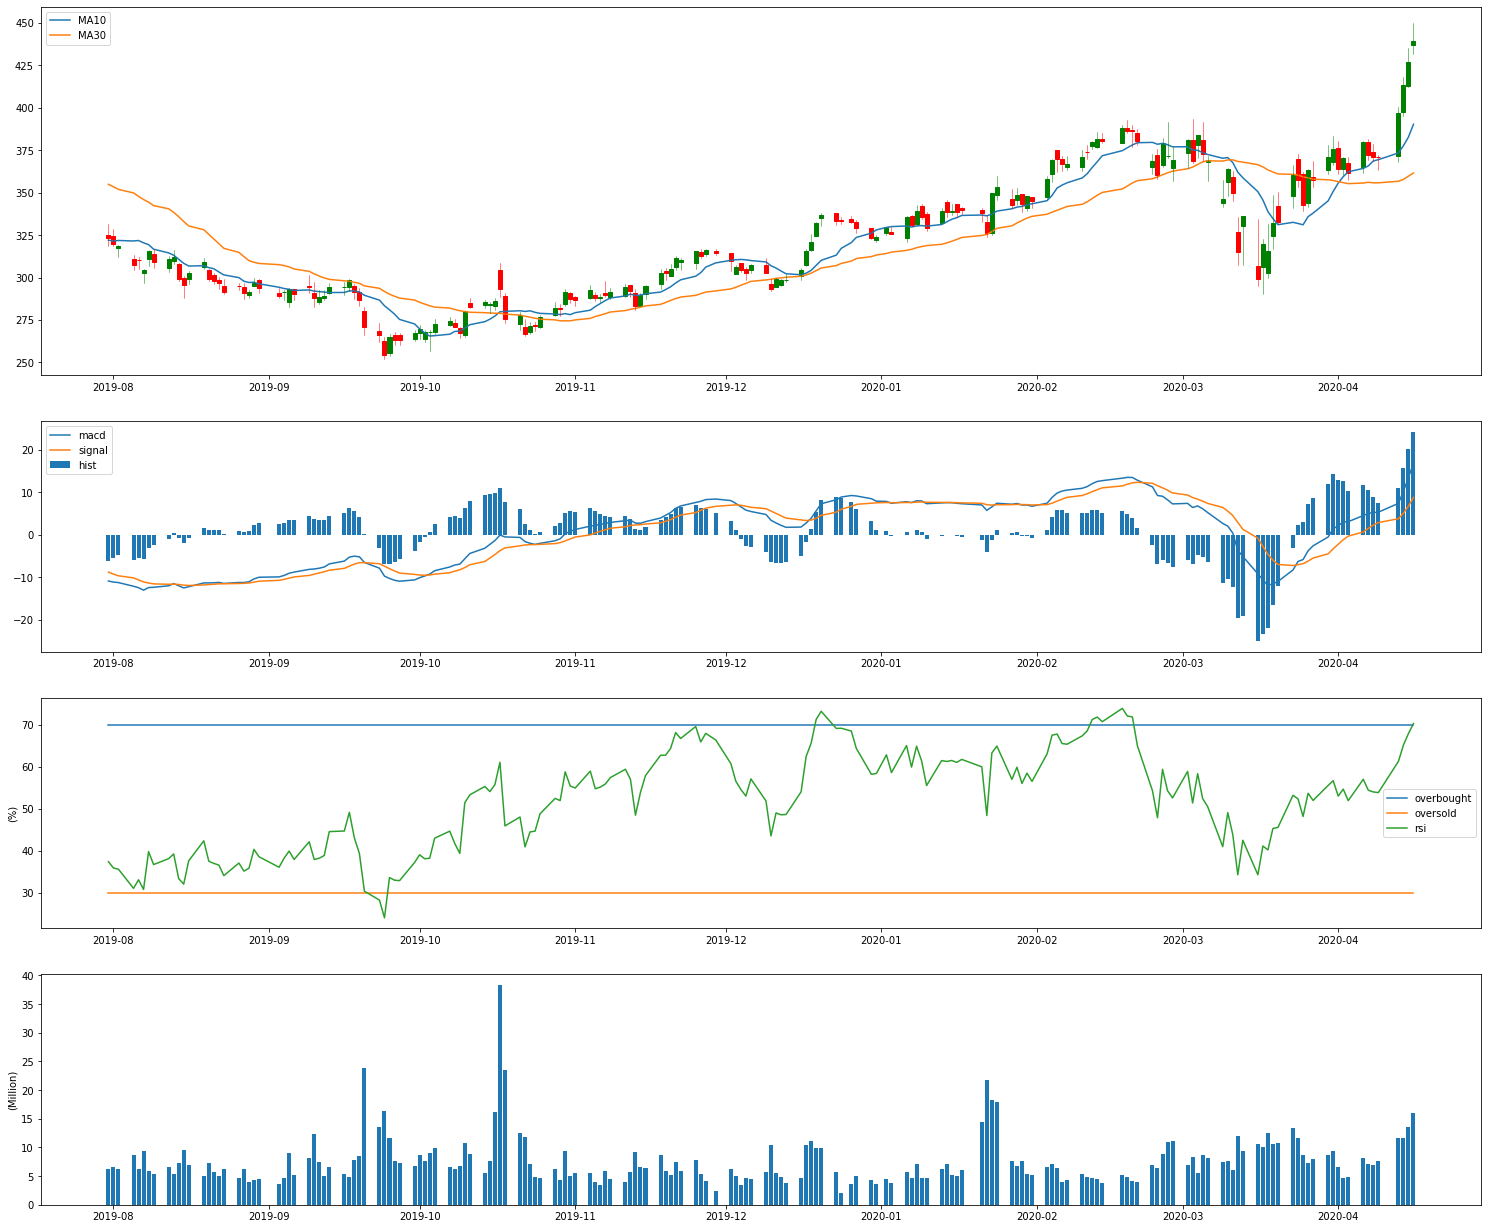

In [7]:
def plot_chart(data, n, ticker):
    
    # Filter number of observations to plot
    data = data.iloc[-n:]
    
    # Create figure and set axes for subplots (1 for stock price, 3 for indicators)
    fig = plt.figure()
    fig.set_size_inches((20, 16))
    ax_candle = fig.add_axes((0, 0.72, 1, 0.32))
    ax_macd = fig.add_axes((0, 0.48, 1, 0.2), sharex=ax_candle)
    ax_rsi = fig.add_axes((0, 0.24, 1, 0.2), sharex=ax_candle)
    ax_vol = fig.add_axes((0, 0, 1, 0.2), sharex=ax_candle)
    
    # Format x-axis ticks as dates
    ax_candle.xaxis_date()
    
    # Get nested list of date, open, high, low and close prices
    ohlc = []
    for date, row in data.iterrows():
        openp, highp, lowp, closep = row[:4]
        ohlc.append([date2num(date), openp, highp, lowp, closep])
 
    # Plot candlestick chart
    ax_candle.plot(data.index, data["ma10"], label="MA10")
    ax_candle.plot(data.index, data["ma30"], label="MA30")
    candlestick_ohlc(ax_candle, ohlc, colorup="g", colordown="r", width=0.8)
    ax_candle.legend()
    
    # Plot MACD
    ax_macd.plot(data.index, data["macd"], label="macd")
    ax_macd.bar(data.index, data["macd_hist"] * 3, label="hist")
    ax_macd.plot(data.index, data["macd_signal"], label="signal")
    ax_macd.legend()
    
    # Plot RSI
    # Above 70% = overbought, below 30% = oversold
    ax_rsi.set_ylabel("(%)")
    ax_rsi.plot(data.index, [70] * len(data.index), label="overbought")
    ax_rsi.plot(data.index, [30] * len(data.index), label="oversold")
    ax_rsi.plot(data.index, data["rsi"], label="rsi")
    ax_rsi.legend()
    
    # Show volume in millions
    ax_vol.bar(data.index, data["Volume"] / 1000000)
    ax_vol.set_ylabel("(Million)")
   
    # Save the chart
    fig.savefig("charts/" + ticker + ".jpeg", bbox_inches="tight")
    plt.show()

plot_chart(nflx_data, 180, "NFLX")

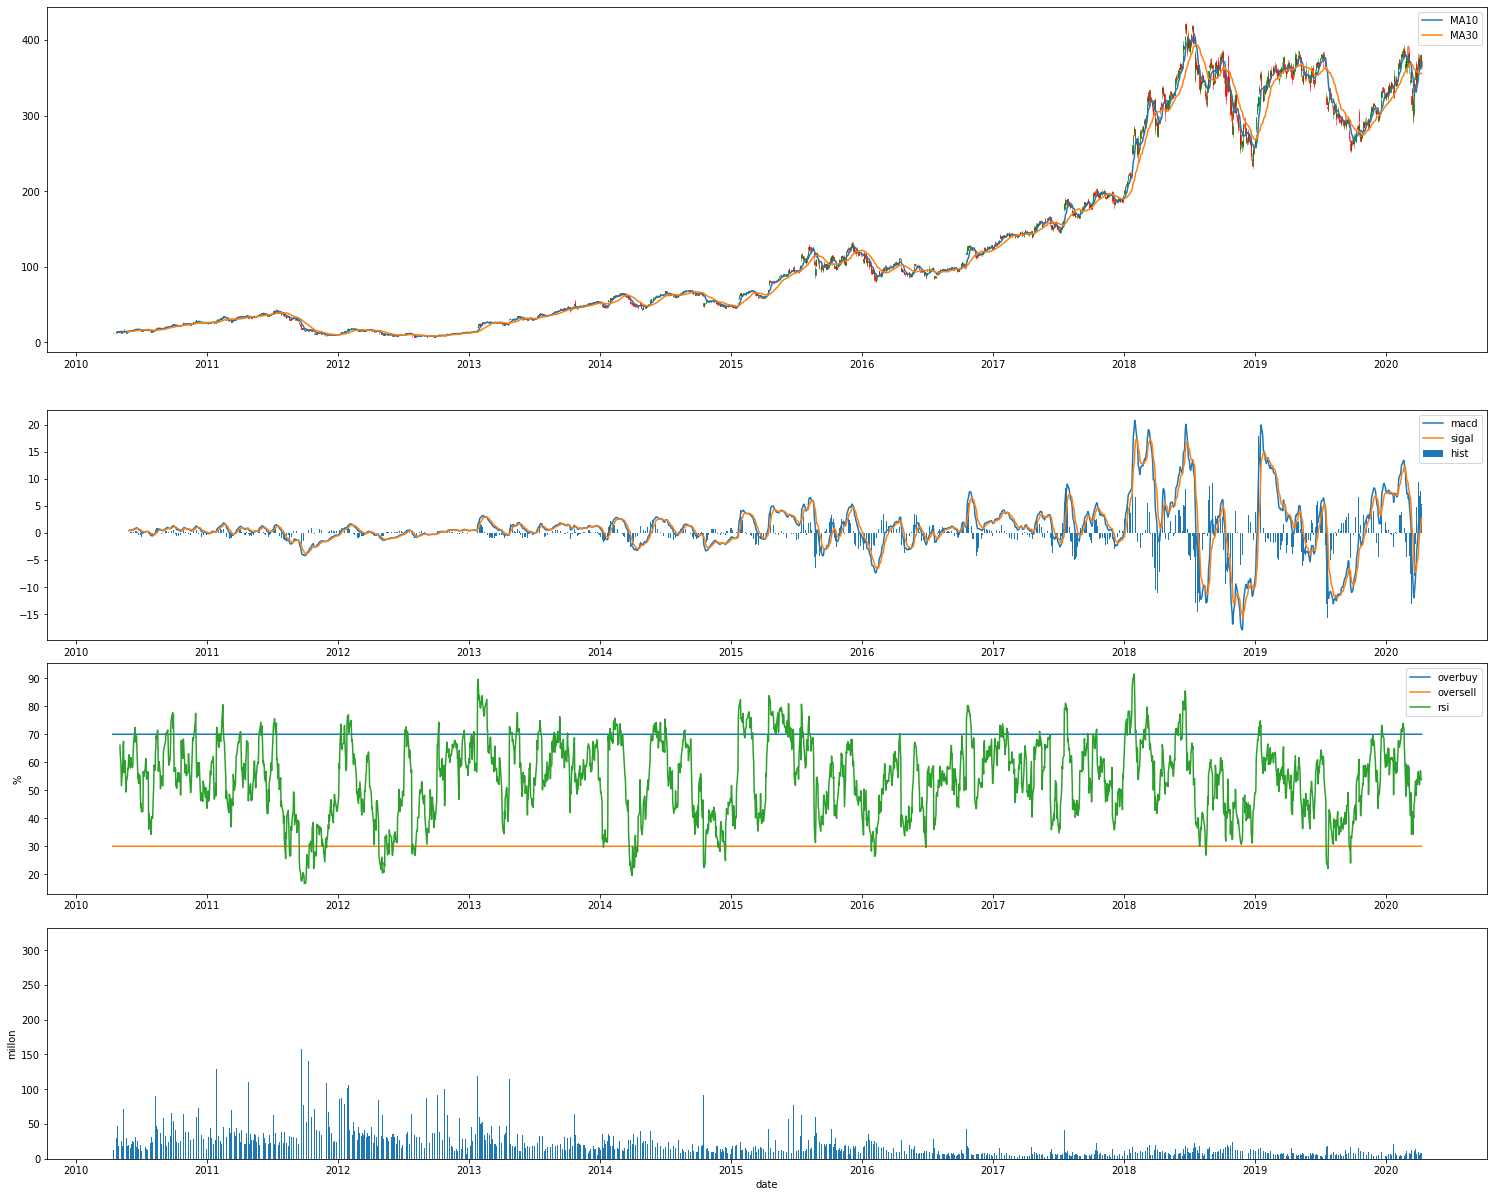